# K-means
Если с набором данных не связаны какие-либо метки, то для поиска в нем некоторой структуры используются алгоритмы обучения без учителя. Этими структурами могут быть различные типы шаблонов данных или групп данных. Кластеризация K-Means - наиболее часто используемый алгоритм обучения без учителя для поиска групп в немаркированных данных. Здесь K представляет количество групп или кластеров, и процесс создания этих групп известен как "кластеризация", поэтому название K-означает кластеризацию. K-средних часто называют алгоритмом Ллойда. Это один из самых популярных алгоритмов кластеризации.

Рассмотрим шаги работы алгритма k-means:

- Первым шагом является окончательное определение количества кластеров, которые вы хотите идентифицировать в своих данных. Это "K" в K-означает кластеризацию.
- Теперь случайным образом инициализируем точки, равные количеству кластеров K. "Центроид кластера" - это терминология, используемая для обозначения этих точек.
- Обратим внимание, что центроид означает центральную точку данного набора данных, но изначально эти точки находятся в случайном расположении, но в конце, когда алгоритм K-средних сойдется, они окажутся в центре своего соответствующего кластера.
- Как только центроиды кластера определены, алгоритм K-средних будет проходить через каждую точку данных из заданных данных и, в зависимости от близости этих точек к центроиду кластера, он назначит точку данных центроиду кластера. Это называется "Этап присвоения".
- Чтобы переместить центроиды кластера из случайного местоположения в их соответствующую группу, алгоритм K-средних найдет среднее значение каждой точки данных, назначенной центроиду кластера, и переместит соответствующий центроид в местоположение среднего значения. Это называется "Шаг перемещения центроида"
- Обратим внимание, что во время "Шага перемещения центроида" точки данных могут быть переназначены из одного кластера в другой по мере изменения положения центроида.
- Теперь повторим назначение и переместим центроид до тех пор, пока положение центроида кластера не перестанет изменяться. Алгоритм K-средних будет сходиться, когда мы получим неизменное положение центроидов кластера. 
- Как только алгоритм K-средних будет сходиться, точка данных, назначенная соответствующему центроиду, будет представлять соответствующий кластер.
- На этапе назначения кластера, если мы нашли центроид, с которым не связана точка данных, то лучше удалить его.

Поскольку мы должны случайным образом выбирать центроиды кластера, его инициализация может повлиять на конечный результат кластеризации. В случае, если наша инициализация неверна, то алгоритм K-средних может сформировать кластер всего с несколькими точками. Такая ситуация называется "ловушкой случайной инициализации центроида", и это может привести к тому, что алгоритм застрянет на локальных оптимумах.

Чтобы избежать ловушки случайной инициализации, следуйте приведенным ниже рекомендациям по случайной инициализации:
- Количество центроидов кластера должно быть меньше количества обучающих примеров
- Чтобы избежать проблемы с локальными оптимумами, попробуйте выполнить множественную случайную инициализацию центроидов. 
- Метод множественной случайной инициализации более эффективен, когда у нас небольшое количество кластеров.
- Аналогично, для большого числа кластеров достаточно нескольких случайных инициализаций

Таким образом, используя случайную инициализацию, мы можем избежать проблемы локальной оптимальности, но чтобы выбрать, сколько кластеров искать в заданных данных, мы можем использовать приведенные ниже методы.
Определение количества кластеров вручную с помощью визуализации данных является одним из наиболее распространенных методов. Знание предметной области и правильное понимание предоставленных данных также помогают принимать более обоснованные решения. Поскольку при выполнении вручную всегда есть возможность для неоднозначных наблюдений, в таких случаях мы также можем использовать "Метод локтя"

# Метод Локтя
В методе локтя мы запускаем алгоритм K-средних несколько раз в цикле с увеличением числа вариантов кластера (скажем, от 1 до 10), а затем выводим оценку кластеризации в зависимости от количества кластеров. Оценка кластеризации - это не что иное, как сумма квадратов расстояний выборок до ближайшего центра кластера. Локоть - это точка на графике, где оценка кластеризации (искажение) замедляется, и значение количества кластеров в этой точке дает нам оптимальное количество кластеров. Но иногда мы не получаем четкой точки пересечения на графике, в таких случаях очень сложно определить количество кластеров.

# Плюсы
- Один из самых простых алгоритмов для понимания
- Поскольку он использует простые вычисления, он относительно эффективен
- Дает лучшие результаты при меньшем перекрытии данных

# Минусы
- Количество кластеров должно быть определено пользователем
- Плохо работает в случае перекрывающихся данных
- Не удается обработать зашумленные данные и выбросы
- Алгоритм не работает для набора нелинейных данных

Теперь мы будем использовать алгоритм кластеризации k-средних для создания групп клиентов на основе годовых расходов и оценки расходов, присвоенной торговым центром.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Набор данных содержит 5 столбцов CustomerID, пол, возраст, годовой доход (k$), оценка расходов (1-100)

In [2]:
df = pd.read_csv('Datasets/Mall_Customers.csv')
print("Shape of the data= ", df.shape)
df.head()

Shape of the data=  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Всего существует 200 обучающих примеров без какой-либо метки, указывающей, какой клиент принадлежит к какой группе.
Мы собираемся использовать оценку годового дохода и расходов, чтобы найти кластеры в данных. Обратим внимание, что оценка расходов составляет от 1 до 100, которая присваивается торговым центром на основе поведения клиентов и характера расходов.

Text(0.5, 1.0, 'Данные клиентов торгового центра')

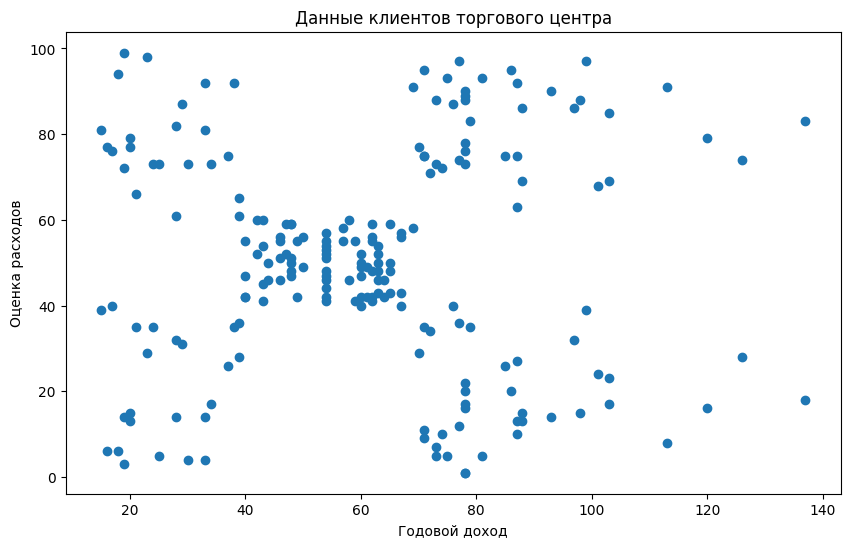

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Годовой доход')
plt.ylabel('Оценка расходов')
plt.title('Данные клиентов торгового центра')

In [4]:
# Поскольку мы собираемся использовать только столбцы оценки годового дохода и расходов, давайте создадим двумерный массив этих столбцов для дальнейшего использования
X = df.iloc[:, [3, 4]].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

# Выберем число кластеров
Визуальным осмотром приведенного выше точечного графика мы можем идентифицировать 5 возможных кластеров. Но поскольку другой доступной информации нет, очень сложно сказать это со 100% уверенностью. Итак, давайте попробуем проверить это с помощью метода локтя.

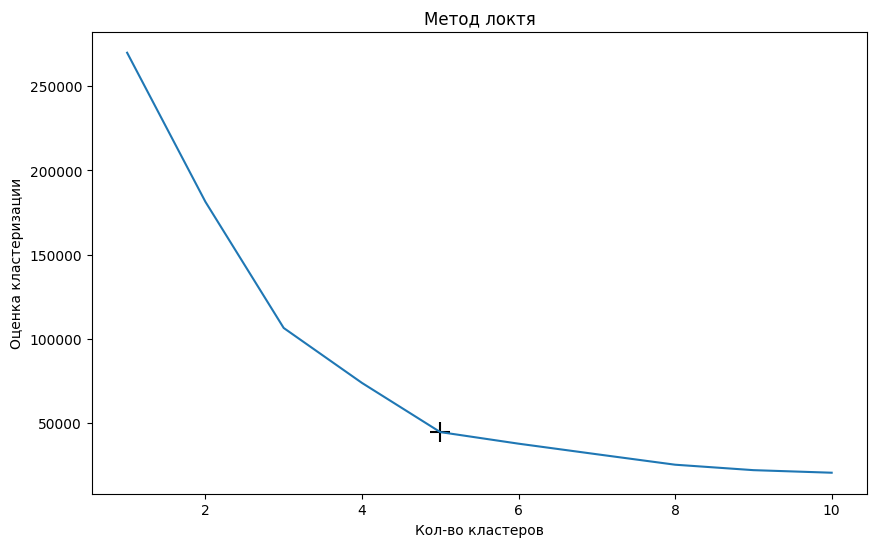

In [8]:
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    kmeans.fit(X)
    clustering_score.append(
        kmeans.inertia_)  # inertia_ = Сумма квадратов расстояний выборок до их ближайшего центра кластера.

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(5, clustering_score[4], s=200, c='black', marker='+')
plt.title('Метод локтя')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Оценка кластеризации')
plt.show()

Из приведенного выше графика видно, что оценка кластеризации замедляется после 5 кластеров. Таким образом, мы можем использовать K=5 для дальнейшего анализа.
Вычислим центры кластеров и спрогнозируем индекс кластера для каждой выборки. Поскольку K=5, мы получим индекс кластера от 0 до 4 для каждой точки данных в нашем наборе данных.

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
pred = kmeans.predict(X)
pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [11]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'])
print('Количество точек данных в каждом кластере: \n', df['Cluster'].value_counts())
df

Количество точек данных в каждом кластере: 
 Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


Давайте выделим центроиды и кластеры разными цветами, чтобы увидеть как алгоритм K-средних сгруппировал данные.

Text(0.5, 1.0, 'Кластеры')

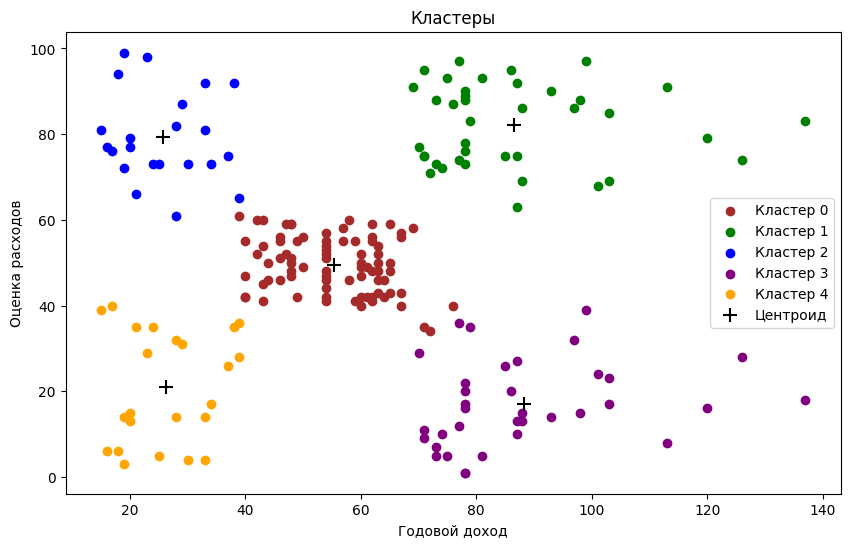

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c='brown', label='Кластер 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c='green', label='Кластер 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c='blue', label='Кластер 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c='purple', label='Кластер 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c='orange', label='Кластер 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Центроид', marker='+')

plt.xlabel('Годовой доход')
plt.ylabel('Оценка расходов')
plt.legend()
plt.title('Кластеры')